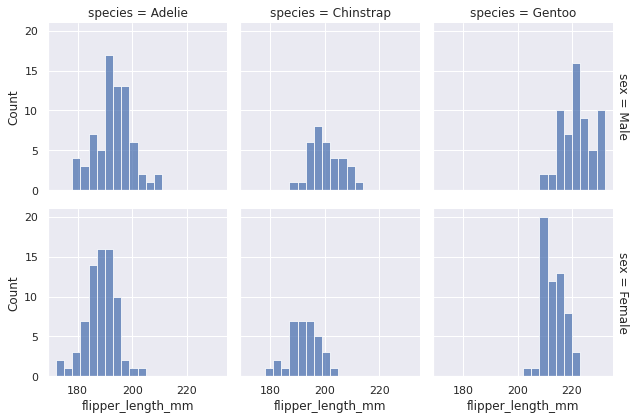

In [30]:
# https://seaborn.pydata.org/examples/faceted_histogram.html

import seaborn as sns

sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
g = sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

g.savefig("histogram.png")

In [31]:
# https://altair-viz.github.io/gallery/layered_histogram.html

import pandas as pd
import altair as alt
import numpy as np
np.random.seed(42)

# Generating Data
source = pd.DataFrame({
    'Trial A': np.random.normal(0, 0.8, 1000),
    'Trial B': np.random.normal(-2, 1, 1000),
    'Trial C': np.random.normal(3, 2, 1000)
})

chart = alt.Chart(source).transform_fold(
    ['Trial A', 'Trial B', 'Trial C'],
    as_=['Experiment', 'Measurement']
).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement:Q', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color('Experiment:N')
)

# chart.save("layered-histogram.png")
chart

alt.Chart(...)

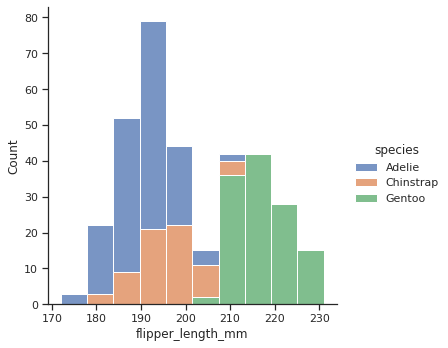

In [32]:
import seaborn as sns
sns.set_theme(style="ticks")

penguins = sns.load_dataset("penguins")

g = sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

g.savefig("stacked-histogram.png")

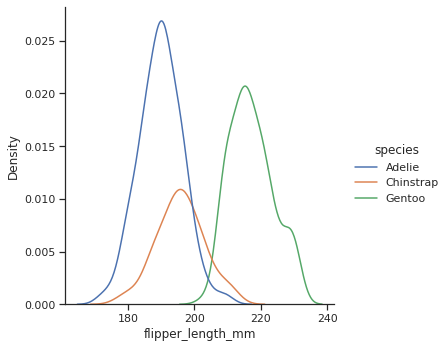

In [33]:
import seaborn as sns
sns.set_theme(style="ticks")

penguins = sns.load_dataset("penguins")

g = sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")

g.savefig("density-plot.png")

In [34]:
# https://altair-viz.github.io/gallery/ridgeline_plot.html

import altair as alt
from vega_datasets import data

source = data.seattle_weather.url

step = 20
overlap = 1

chart = alt.Chart(source, height=step).transform_timeunit(
    Month='month(date)'
).transform_joinaggregate(
    mean_temp='mean(temp_max)', groupby=['Month']
).transform_bin(
    ['bin_max', 'bin_min'], 'temp_max'
).transform_aggregate(
    value='count()', groupby=['Month', 'mean_temp', 'bin_min', 'bin_max']
).transform_impute(
    impute='value', groupby=['Month', 'mean_temp'], key='bin_min', value=0
).mark_area(
    interpolate='monotone',
    fillOpacity=0.8,
    stroke='lightgray',
    strokeWidth=0.5
).encode(
    alt.X('bin_min:Q', bin='binned', title='Maximum Daily Temperature (C)'),
    alt.Y(
        'value:Q',
        scale=alt.Scale(range=[step, -step * overlap]),
        axis=None
    ),
    alt.Fill(
        'mean_temp:Q',
        legend=None,
        scale=alt.Scale(domain=[30, 5], scheme='redyellowblue')
    )
).facet(
    row=alt.Row(
        'Month:T',
        title=None,
        header=alt.Header(labelAngle=0, labelAlign='right', format='%B')
    )
).properties(
    title='Seattle Weather',
    bounds='flush'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_title(
    anchor='end'
)

# chart.save("ridgeline.png")
chart

alt.FacetChart(...)